In [3]:
#import required libraries — we do need the models, flatten, dense, input layers 
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [18]:
# Path for train, validation and test datasets
train_path = '/Users/asmanaseer/Downloads/Train-Test Zip/DataSplit/train'
# valid_path = '/Users/asmanaseer/Downloads/Test'
# test_path = '/Users/asmanaseer/Downloads/Test'
valid_path = '/Users/asmanaseer/Downloads/Train-Test Zip/DataSplit/validation'
test_path = '/Users/asmanaseer/Downloads/Train-Test Zip/DataSplit/test'
batchSize = 64
IMAGE_SIZE = [224, 224] #Default image size for VGG16
folders = glob('/Users/asmanaseer/Downloads/Train-Test Zip/Train/*') #Get number of classes
# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
#Through flow_from_directory - we create an array of images that can be used for training. 
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batchSize,
                                                 class_mode = 'categorical')
validation_set = validation_datagen.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = batchSize,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 13468 images belonging to 15 classes.
Found 4042 images belonging to 15 classes.
Found 1739 images belonging to 15 classes.


In [5]:
# Create a VGG16 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

2023-12-25 20:33:49.658819: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-25 20:33:49.658860: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-25 20:33:49.658869: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-25 20:33:49.658917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 20:33:49.658950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
#Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=validation_set, epochs=20, batch_size=batchSize)

Epoch 1/20


2023-12-25 20:33:50.880498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 523s 2s/step - loss: 1.3133 - accuracy: 0.5643 - val_loss: 0.9689 - val_accuracy: 0.6599
Epoch 2/20
301/301 [==============================] - 514s 2s/step - loss: 0.9709 - accuracy: 0.6717 - val_loss: 0.7825 - val_accuracy: 0.7363
Epoch 3/20
301/301 [==============================] - 516s 2s/step - loss: 0.8507 - accuracy: 0.7073 - val_loss: 0.7289 - val_accuracy: 0.7482
Epoch 4/20
301/301 [==============================] - 513s 2s/step - loss: 0.7883 - accuracy: 0.7294 - val_loss: 0.7449 - val_accuracy: 0.7333
Epoch 5/20
301/301 [==============================] - 515s 2s/step - loss: 0.7488 - accuracy: 0.7427 - val_loss: 0.5587 - val_accuracy: 0.8124
Epoch 6/20
301/301 [==============================] - 512s 2s/step - loss: 0.7150 - accuracy: 0.7561 - val_loss: 0.5854 - val_accuracy: 0.7986
Epoch 7/20
301/301 [==============================] - 513s 2s/step - loss: 0.6688 - accuracy: 0.7702 - val_loss: 0.5836 - val_accuracy: 0.7924
Epoch 8/20

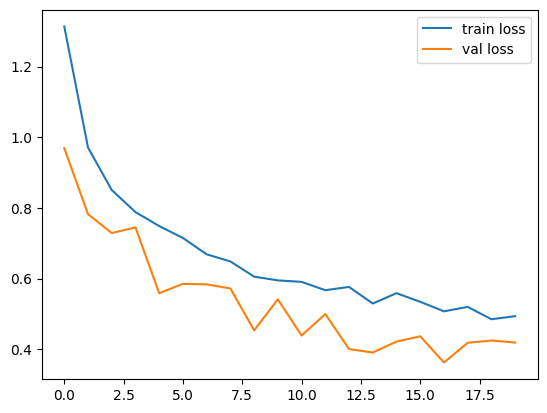

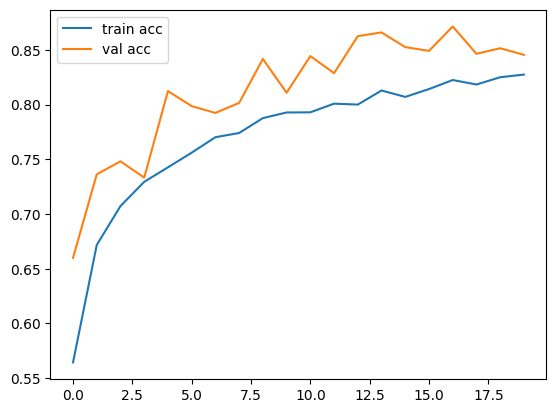

In [7]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
 
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
model=load_model('/Volumes/MyData/SarahGermany/Python/VGG16.h5')
history = model.fit(training_set, validation_data=validation_set, epochs=10, batch_size=batchSize)

Epoch 1/10
211/211 [==============================] - 238s 1s/step - loss: 0.4640 - accuracy: 0.8317 - val_loss: 0.4407 - val_accuracy: 0.8491
Epoch 2/10
211/211 [==============================] - 240s 1s/step - loss: 0.4411 - accuracy: 0.8436 - val_loss: 0.4529 - val_accuracy: 0.8422
Epoch 3/10
211/211 [==============================] - 235s 1s/step - loss: 0.4389 - accuracy: 0.8436 - val_loss: 0.4740 - val_accuracy: 0.8365
Epoch 4/10
211/211 [==============================] - 235s 1s/step - loss: 0.4208 - accuracy: 0.8502 - val_loss: 0.4999 - val_accuracy: 0.8258
Epoch 5/10
211/211 [==============================] - 234s 1s/step - loss: 0.4356 - accuracy: 0.8424 - val_loss: 0.5763 - val_accuracy: 0.7986
Epoch 6/10
211/211 [==============================] - 236s 1s/step - loss: 0.4201 - accuracy: 0.8497 - val_loss: 0.4942 - val_accuracy: 0.8357
Epoch 7/10
211/211 [==============================] - 236s 1s/step - loss: 0.3954 - accuracy: 0.8623 - val_loss: 0.6034 - val_accuracy: 0.8003

In [29]:
predict=model.predict(test_set)
lossTest, accuracyTest=model.evaluate(test_set)

# #confusion matrix
# # You need to iterate over the data, then you can collect predictions and true classes.
# predicted_probs = np.empty([])
# true_classes =  np.empty([])

# for images, labels in test_ds:
#   predicted_probs = np.concatenate([predicted_probs,
#                        model(images)])
#   true_classes = np.concatenate([true_classes, labels.numpy()])

# # Since they are sigmoid outputs, you need to transform them into classes with a threshold, i.e 0.5 here:
# predicted_classes = [1 * (x[0]>=0.5) for x in predicted_probs]

# # confusion matrix etc:
# conf_matrix = tf.math.confusion_matrix(true_classes, predicted_classes)
# print(conf_matrix) 

64/64 [==============================] - 55s 853ms/step - loss: 0.5542 - accuracy: 0.8196


In [33]:
print(predict)

[[6.13134659e-07 2.39560250e-04 4.68367746e-29 ... 1.21952148e-18
  1.75053690e-04 9.96166705e-08]
 [1.03980847e-06 2.12238519e-04 1.48521016e-21 ... 3.89044781e-19
  5.28820578e-07 2.69917283e-10]
 [9.91682112e-01 8.03226046e-03 8.45248793e-32 ... 1.01454944e-21
  2.06719720e-04 5.13784126e-10]
 ...
 [2.99165084e-04 9.99672413e-01 2.30217653e-30 ... 1.07435420e-24
  1.67352846e-05 5.12935230e-06]
 [6.77718126e-05 3.07738897e-04 1.06676074e-17 ... 7.50163797e-21
  1.13295535e-07 6.13348348e-13]
 [2.34515082e-05 7.51521438e-04 1.14594864e-20 ... 2.74504293e-16
  2.34307969e-04 9.27241128e-09]]


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 32
num_of_test_samples = 175

predictions = model.predict(test_set,  num_of_test_samples // batch_size+1)

y_pred = np.argmax(predictions, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

print(class_labels)
print(confusion_matrix(test_set.classes, y_pred))
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

55/55 [==============================] - 22s 415ms/step
['0', '1', '11', '12', '17', '18', '2', '20', '21', '4', '5', '6', '7', '8', '9']
[[ 18  78   1   8  40   0   0   0   0  35   1   2   0  10   0]
 [ 59 206   0  55 145   2   1   1   0  68   0   3   0  31   8]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [ 10  59   0  15  34   1   0   0   1  21   0   1   0  12   2]
 [ 33 158   0  33  96   2   0   0   0  41   2   3   1  24   3]
 [  0   3   0   0   1   0   0   0   0   1   0   0   0   1   0]
 [  0   1   0   1   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 21  86   0  17  56   0   0   0   0  33   1   2   1   8   3]
 [  2   1   0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  3   3   0   1   2   1   0   0   0   3   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [ 11  50   0   7  36   0   1   0   0  18  

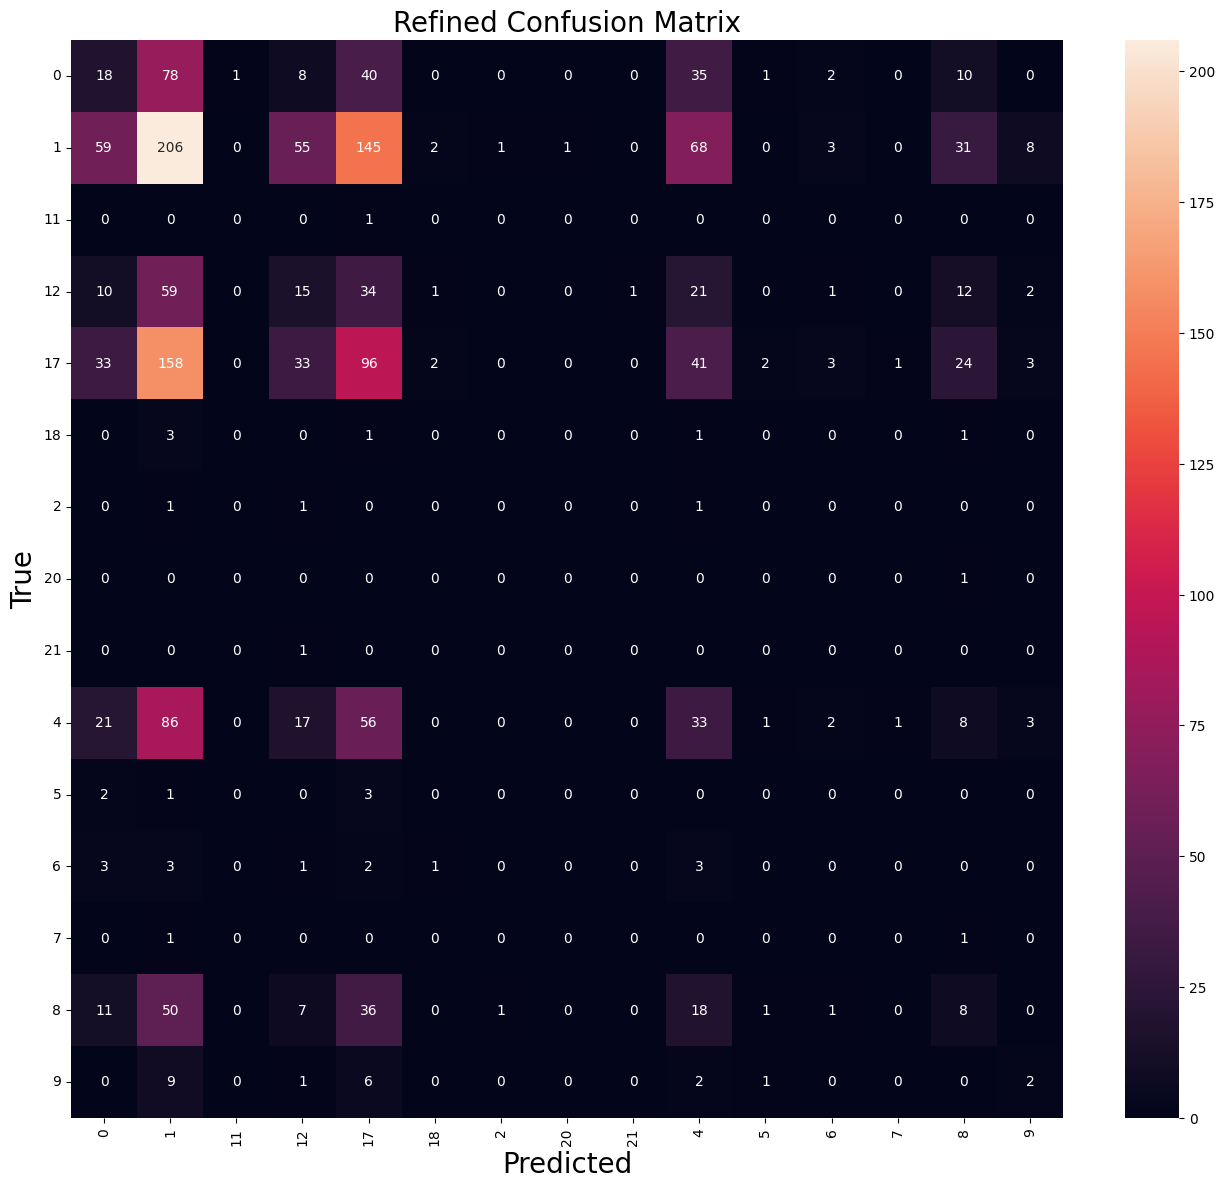

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
y_pred = np.argmax(predictions, axis=1)
y_true=test_set.classes 
class_labels = list(test_set.class_indices.keys())   

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_labels, fontsize = 10)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Refined Confusion Matrix', fontsize=20)
plt.savefig('ConMat24.png')
plt.show()

In [36]:
from tensorflow.keras.models import load_model
model.save('/Volumes/MyData/SarahGermany/Python/VGG16.h5')

/Users/asmanaseer/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
## !pip install --upgrade pip
# import os
# import splitfolders
# input_dir = "/Users/asmanaseer/Downloads/Train-Test Zip/Valid/Validation"
# output_dir = "/Users/asmanaseer/Downloads/Train-Test Zip/Valid/Test"
# def split_data(input_dir, output_dir, x):
#     splitfolders.ratio(input_dir, output = output_dir, seed = 1337, ratio = (x,1-x), group_prefix = None)
# split_data(input_dir,output_dir,0.7)

Copying files: 5781 files [00:02, 2853.53 files/s]
